In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

### Lectura de imágenes

In [43]:
# Lectura de las imágenes para entranamiento
import os
rootdir = os.getcwd() + "\\dataset"
os.listdir(rootdir) 

X = []
y = []


for caracter in os.listdir(rootdir):
    # break
    # print("Caracter:", caracter)
    # print("Path:", rootdir + caracter)

    directorio_caracter = rootdir + "\\" + caracter

    for filename in os.listdir(directorio_caracter): 
        # print("Filename", filename)
        # print("Path:", directorio_caracter + "\\" +filename)
        

        # Lectura de las imágenes 
        img_gray = cv.imread(directorio_caracter + "\\" + filename, cv.IMREAD_GRAYSCALE)
        imgbin = cv.adaptiveThreshold(img_gray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,41,5)

        # cvlib.imgview(imgbin)
        
        X.append(imgbin.flatten())
        y.append(caracter)

## Split de train y test

In [3]:
np.array(X).shape

(35500, 7500)

In [4]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y2 = label.fit_transform(y)

In [5]:
# print(np.unique(y2))
# print(label.inverse_transform(np.unique(y2)))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y2, test_size=.25, random_state=200)

## Entrenamiento del modelo

In [7]:
modelo = XGBClassifier(random_state = 200, n_jobs = 8)

In [8]:
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=8,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
y_pred = modelo.predict(X_val)

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_val, y_pred)) 

0.9890704225352113

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       238
           1       0.99      1.00      0.99       254
           2       1.00      0.98      0.99       270
           3       0.97      0.99      0.98       260
           4       1.00      0.97      0.99       277
           5       0.99      0.99      0.99       260
           6       0.97      0.97      0.97       247
           7       0.99      1.00      1.00       253
           8       0.96      0.97      0.96       262
           9       0.99      0.99      0.99       283
          10       0.98      0.99      0.98       244
          11       0.98      0.95      0.96       250
          12       0.98      0.99      0.98       265
          13       0.99      0.99      0.99       227
          14       1.00      1.00      1.00       259
          15       0.99      1.00      0.99       249
          16       0.99      1.00      0.99       254
          17       1.00    

## Preservación del modelo

In [12]:
from joblib import dump
dump(modelo, 'modelos/modelo2.joblib') 
dump(label, 'modelos/label_encoder2.joblib')

['label_encoder2.joblib']

In [1]:
from joblib import load
modelo = load('modelos/modelo2.joblib') 
label = load('modelos/label_encoder2.joblib')

## Pruebas

(702, 240)


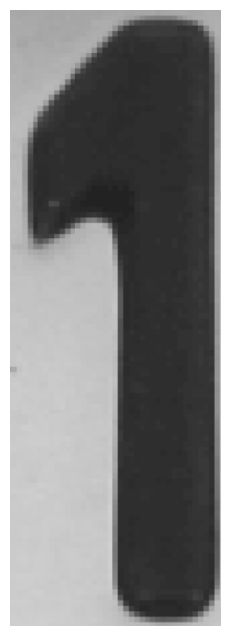

In [70]:
im_gray = cv.imread("imagenes/caracter4.png", cv.IMREAD_GRAYSCALE)

print(im_gray.shape)
cvlib.imgview(im_gray)

(100, 75)


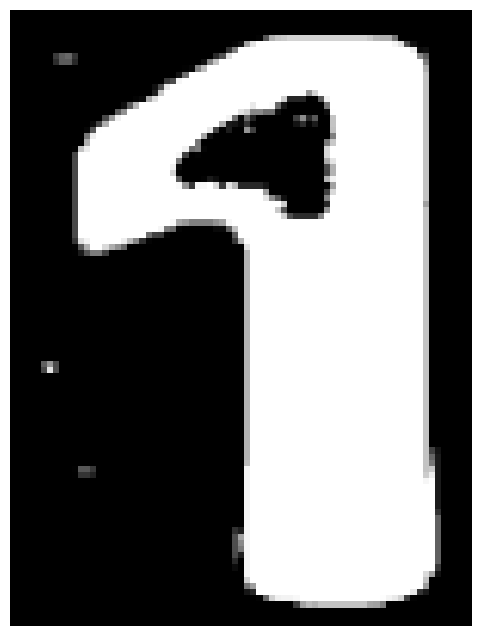

In [71]:

imgbin = cv.adaptiveThreshold(im_gray, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,201,5)

imgbin = np.pad(imgbin, 20, 'constant', constant_values=0)

imgbin = cv.resize(imgbin, (75, 100), interpolation = cv.INTER_AREA)

print(imgbin.shape)
cvlib.imgview(imgbin)

In [72]:
im_prueba = imgbin.flatten()

im_prueba.shape

(7500,)

In [73]:
[im_prueba,im_prueba]

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [74]:
label.inverse_transform(modelo.predict([im_prueba,im_prueba]))

array(['1', '1'], dtype='<U1')